In [2]:
import pandas as pd
import numpy as np

### Installing LXML since Kernel shoots 'LXML' Error while reading the Wikipedia Page

In [3]:
pip install lxml

     |████████████████████████████████| 5.8MB 5.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import lxml

In [5]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [6]:
dfs = pd.read_html(url)

In [7]:
frame=dfs[0:1]
frame

[    Postcode           Borough          Neighbourhood
 0        M1A      Not assigned           Not assigned
 1        M2A      Not assigned           Not assigned
 2        M3A        North York              Parkwoods
 3        M4A        North York       Victoria Village
 4        M5A  Downtown Toronto           Harbourfront
 ..       ...               ...                    ...
 282      M8Z         Etobicoke              Mimico NW
 283      M8Z         Etobicoke     The Queensway West
 284      M8Z         Etobicoke  Royal York South West
 285      M8Z         Etobicoke         South of Bloor
 286      M9Z      Not assigned           Not assigned
 
 [287 rows x 3 columns]]

In [8]:
data=frame[0]

In [9]:
data

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


In [10]:
data.shape

(287, 3)

In [11]:
data.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


#### Setting the Borough as Index and deleting Indexes which are equal to 'Not assigned'

In [12]:
data = data.set_index("Borough")

In [13]:
data=data.drop('Not assigned',axis=0)

In [14]:
data.reset_index(inplace=True)

#### Checking for 'Not assigned' values in column 'Neighbourhood'

In [15]:
(data['Neighbourhood']=='Not assigned').value_counts()

False    210
Name: Neighbourhood, dtype: int64

In [16]:
print(data.shape)
data.head()

(210, 3)


,Borough,Postcode,Neighbourhood
0,North York,M3A,Parkwoods
1,North York,M4A,Victoria Village
2,Downtown Toronto,M5A,Harbourfront
3,North York,M6A,Lawrence Heights
4,North York,M6A,Lawrence Manor


In [17]:
df=data

In [18]:
df

,Borough,Postcode,Neighbourhood
0,North York,M3A,Parkwoods
1,North York,M4A,Victoria Village
2,Downtown Toronto,M5A,Harbourfront
3,North York,M6A,Lawrence Heights
4,North York,M6A,Lawrence Manor
...,...,...,...
205,Etobicoke,M8Z,Kingsway Park South West
206,Etobicoke,M8Z,Mimico NW
207,Etobicoke,M8Z,The Queensway West
208,Etobicoke,M8Z,Royal York South West


In [19]:
print(df['Postcode'].value_counts())

M9V    8
M8Y    8
M5V    7
M4V    5
M9B    5
      ..
M1X    1
M5E    1
M4M    1
M4P    1
M9A    1
Name: Postcode, Length: 103, dtype: int64


In [20]:
table=df.groupby(['Postcode','Borough'],as_index=False, sort=False).agg(','.join)

### Having a look at the values corresponding to 'M9C' in the Original table df

In [21]:
for i in df.index:
    if df.iloc[i,1] == 'M9V':
        print(df.iloc[i,2])

Albion Gardens
Beaumond Heights
Humbergate
Jamestown
Mount Olive
Silverstone
South Steeles
Thistletown


### Checking number of 'M9V' in TABLE that is grouped-by Postcode

In [22]:
for i in table.index:
    if table.iloc[i,0] == 'M9V':
        print(table.iloc[i,0])

M9V


### Checking if all the values corresponding to 'M9V' are present in it's row

In [23]:
print(table[table['Postcode']=='M9V'])
table.loc[89,'Neighbourhood']

   Postcode    Borough                                      Neighbourhood
89      M9V  Etobicoke  Albion Gardens,Beaumond Heights,Humbergate,Jam...


'Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown'

In [24]:
table

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park
...,...,...,...
98,M8X,Etobicoke,"The Kingsway,Montgomery Road,Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern
101,M8Y,Etobicoke,"Humber Bay,King's Mill Park,Kingsway Park Sout..."


## Another Algorithm I tried to group the values as per 'Postcode', which did not work

### for i in range(0,211):
        for j in range(i+1,211):
            if df['Postcode'][i]==df['Postcode'][j]:
                #print(df['Neighbourhood'][i],df['Neighbourhood'][j])
                df['Neighbourhood'][i]=df['Neighbourhood'][i]+', '+df['Neighbourhood'][j]
                df.drop(j,inplace=True)
            else:
                print('Invalid')

### Cross-Checking if there are any duplicate values in columns 'Postcode'

In [25]:
print(table['Postcode'].value_counts())

M4G    1
M4M    1
M1L    1
M1W    1
M1K    1
      ..
M2L    1
M6H    1
M6N    1
M3L    1
M9A    1
Name: Postcode, Length: 103, dtype: int64


In [26]:
(table['Neighbourhood']=='Not Assigned').value_counts()

False    103
Name: Neighbourhood, dtype: int64

### Getting Latitude Longitude Coordinates using Geocoder, which did not work as expected by the Faculty

In [28]:
pip install geocoder

     |████████████████████████████████| 102kB 4.4MB/s ta 0:00:011
     |████████████████████████████████| 829kB 13.4MB/s eta 0:00:01
     |████████████████████████████████| 81kB 16.6MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [29]:
import geocoder

In [30]:
g = geocoder.google('Mountain View, CA')
print(g.latlng)

None


In [31]:
latlng=None

In [71]:
table.columns

Index(['Postcode', 'Borough', 'Neighbourhood'], dtype='object')

In [48]:
print(table.iloc[0,0],table.iloc[0,1])

M3A North York


In [70]:
latlng

In [ ]:
#for i in table.index:
while(latlng is None):
    g = geocoder.google('{}, {}, {}'.format(table.iloc[0,0],table.iloc[0,1],table.iloc[0,2]))
    latlng=g

In [348]:
for i in range(0,10):
    print('{}, {}, {}'.format(table.iloc[i,0],table.iloc[i,1],table.iloc[i,2]))

M3A, North York, Parkwoods
M4A, North York, Victoria Village
M5A, Downtown Toronto, Harbourfront
M6A, North York, Lawrence Heights,Lawrence Manor
M7A, Downtown Toronto, Queen's Park
M9A, Etobicoke, Islington Avenue
M1B, Scarborough, Rouge,Malvern
M3B, North York, Don Mills North
M4B, East York, Woodbine Gardens,Parkview Hill
M5B, Downtown Toronto, Ryerson,Garden District


## Making use of the file provided to get Latitudes and Longitudes

In [27]:
file = pd.read_csv('http://cocl.us/Geospatial_data')

In [28]:
file

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [29]:
file.iloc[0,1]

43.806686299999996

### Inserting Lat and Lng Columns in the Table

In [30]:
Latitude=[]
Longitude=[]

In [31]:
for j in table.index:
    for i in file.index:
        if table.iloc[j,0]==file.iloc[i,0]:
            Latitude.append(file.iloc[i,1])
            Longitude.append(file.iloc[i,2])

In [32]:
table['Latitude']=Latitude

In [33]:
table['Longitude']=Longitude

In [34]:
table

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway,Montgomery Road,Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558
101,M8Y,Etobicoke,"Humber Bay,King's Mill Park,Kingsway Park Sout...",43.636258,-79.498509


In [35]:
table['Borough'].values

array(['North York', 'North York', 'Downtown Toronto', 'North York',
       'Downtown Toronto', 'Etobicoke', 'Scarborough', 'North York',
       'East York', 'Downtown Toronto', 'North York', 'Etobicoke',
       'Scarborough', 'North York', 'East York', 'Downtown Toronto',
       'York', 'Etobicoke', 'Scarborough', 'East Toronto',
       'Downtown Toronto', 'York', 'Scarborough', 'East York',
       'Downtown Toronto', 'Downtown Toronto', 'Scarborough',
       'North York', 'North York', 'East York', 'Downtown Toronto',
       'West Toronto', 'Scarborough', 'North York', 'North York',
       'East York', 'Downtown Toronto', 'West Toronto', 'Scarborough',
       'North York', 'North York', 'East Toronto', 'Downtown Toronto',
       'West Toronto', 'Scarborough', 'North York', 'North York',
       'East Toronto', 'Downtown Toronto', 'North York', 'North York',
       'Scarborough', 'North York', 'North York', 'East Toronto',
       'North York', 'York', 'North York', 'Scarborough', 'Nort

In [36]:
tor=table[table['Borough'].str.contains("Toronto")]

In [37]:
tor.reset_index(drop=True,inplace=True)

In [38]:
tor.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
2,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [39]:
from sklearn.cluster import KMeans
import folium

In [40]:
map = folium.Map(location=[43.6532,-79.3832])

In [41]:
for lat, lng, br, nh in zip(tor['Latitude'],tor['Longitude'],tor['Borough'],tor['Neighbourhood']):
    label='{}. {}'.format(nh,br)
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=3,
        popup=label, color='red', fill=True, parse_htmal=False).add_to(map)

In [42]:
map

In [43]:
import matplotlib.pyplot as plt

## Obtaining Optimal k

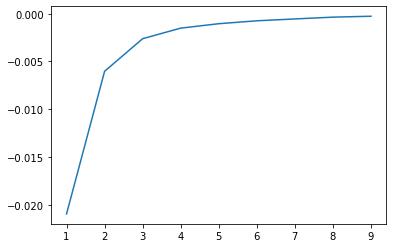

In [44]:
k=range(1,10)
kmeans=[KMeans(n_clusters=i) for i in k]

yaxis=tor[['Latitude']]
score=[kmeans[i].fit(yaxis).score(yaxis) for i in range(len(k))]

plt.plot(k,score)



In [45]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(tor[['Latitude','Longitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
tor['Label']=kmeans.fit_predict(tor[['Latitude','Longitude']])
centers=kmeans.cluster_centers_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
tor.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Label
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,0
2,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937,0
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0


In [48]:
tor.shape

(39, 6)

In [49]:
centers

array([[ 43.65717334, -79.3693986 ],
       [ 43.70197979, -79.39895406],
       [ 43.65506566, -79.44547176]])

In [50]:
labels = kmeans.predict(tor[['Latitude','Longitude']])

In [51]:
kcolor=3
labels

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## Visualising the Clusters

In [52]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [53]:
x = np.arange(kcolor)
ys = [i + x + (i*x)**2 for i in range(kcolor)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markercolor=[]
for lat, lng, nh, cluster in zip(tor['Latitude'],tor['Longitude'],tor['Neighbourhood'],tor['Label']):
    label=folium.Popup(nh + ' Cluster' + str(cluster),parse_html=True)
    folium.CircleMarker(
        [lat,lng], radius=3, popu=label, color=rainbow[cluster-1]).add_to(map)
    
map

## Visualising Map clusters

In [54]:
from folium import plugins

In [55]:
clusters=plugins.MarkerCluster().add_to(map)

for lat, lng, label, in zip(tor.Latitude, tor.Longitude, tor.Label):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        
    ).add_to(clusters)

In [56]:
map